### Stakeholder plots

In [1]:
from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools
from collections     import OrderedDict
from matplotlib      import pyplot, animation, rcParams, patches
from dateutil        import parser
from importlib       import reload
import datetime
import os
import xarray as xr

%matplotlib inline
rcParams.update({'font.size': 12})
rcParams["axes.formatter.useoffset"] = False

In [9]:
# Load and process results
timerange = ['2016 Oct 16 00:00', '2016 Oct 17 00:00']
GEM = nc_tools.load_GEM_from_erddap(timerange)
NEMO = nc_tools.load_NEMO_from_path(timerange, fields=['u_vel', 'v_vel'], depth=[0, 1], model='nowcast-green').isel(depth=0)
NEMO['u_vel'] = viz_tools.unstagger_xarray(NEMO.u_vel, 'gridX')
NEMO['v_vel'] = viz_tools.unstagger_xarray(NEMO.v_vel, 'gridY')
NEMO['u_vel'], NEMO['v_vel'] = viz_tools.rotate_vel(NEMO['u_vel'], NEMO['v_vel'])

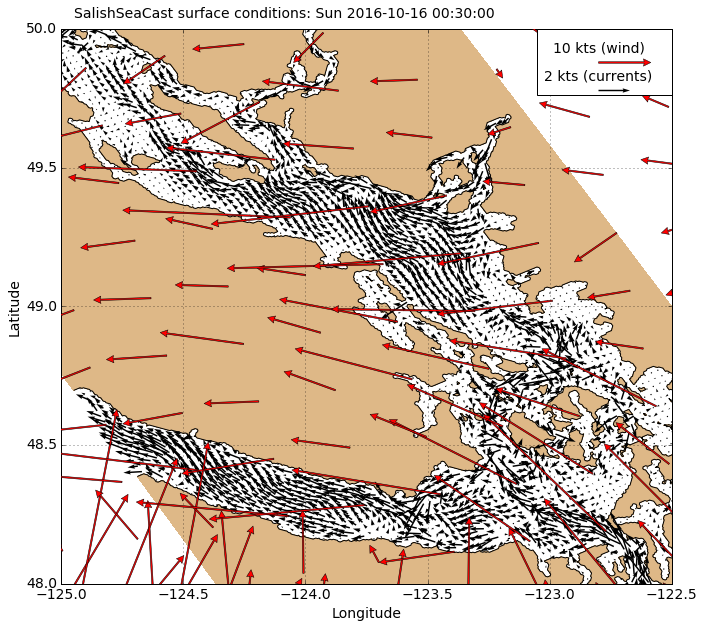

In [18]:
# Make figure and coastline

rcParams.update({'font.size': 14})
fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
visualisations.create_figure(ax, NEMO.isel(time=0))

# Plot surface currents
Q_vel = visualisations.plot_velocity(ax, 'NEMO', NEMO.isel(time=0))
Q_wind = visualisations.plot_velocity(ax, 'GEM', GEM.isel(time=0), spacing=10,
                    color='red', scale=60, linewidth=0.5, headwidth=5, mask=False)

# Plot quiver key with a white rectangle
lbox = ax.add_patch(patches.Rectangle((0.78, 0.88), 0.22, 0.12,
                    facecolor='white', transform=ax.transAxes, zorder=10))
Qkey_wind = pyplot.quiverkey(Q_wind, 0.88, 0.94, 5.14, '10 kts (wind)', coordinates='axes').set_zorder(11)
Qkey_vel  = pyplot.quiverkey(Q_vel,  0.88, 0.89, 1.03, '2 kts (currents)', coordinates='axes').set_zorder(12)
TXT_time = ax.text(0.02, 1.02, 'SalishSeaCast surface conditions: ' +
                   nc_tools.xarraytime_to_datetime(NEMO.time[0]).strftime('%a %Y-%m-%d %H:%M:%S'), transform=ax.transAxes)

fig.tight_layout()
fig.savefig('/home/bmoorema/Desktop/test.eps')